In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata, LinearNDInterpolator
import matplotlib.pyplot as plt
import math

In [40]:
hbo = pd.read_csv('testarray.csv')
hbo = hbo.iloc[3:51].to_numpy()
hbo1 = np.nanmean(hbo, axis=1)

# import matplotlib.pyplot as plt
# plt.scatter(df[0], df[1])

(-0.5, 599.5, 159.5, -0.5)

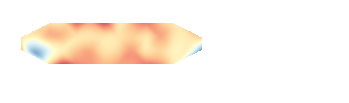

In [13]:
import numpy as np
x_ = [3,4,5,1,2,3,4,5,1,2,3,4,5,3,4,5,6,7,8,9,6,7,8,9,6,7,8,9,6,7,8,9,10,11,12,10,11,12,13,14,10,11,12,13,14,10,11,12]
y_ = [4,4,4,3,3,3,3,3,2,2,2,2,2,1,1,1,4,4,4,4,3,3,3,3,2,2,2,2,1,1,1,1,4,4,4,3,3,3,3,3,2,2,2,2,2,1,1,1]
y_48 = (np.array(y_)-1)*2.5+3
x_48 = np.array(x_)*2.5
xi_, yi_ = np.meshgrid( np.arange(0.1,60.1,0.1), np.arange(0.1,16.1,0.1))
gg = griddata((x_48, y_48), hbo1, (xi_, yi_), method='cubic')

fig, ax = plt.subplots()
ax.imshow(gg,  alpha=0.7, zorder=10).set_cmap("RdYlBu")
ax.axis('off')

In [14]:
input_signal = np.corrcoef(hbo)
input_signal = np.triu(input_signal, k=0)
corr_mat = np.triu(input_signal, k=0)
corrlist = []
a = 1
for i in corr_mat:
    corrlist.extend(i[a:])
    a+=1

d:\python64\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
d:\python64\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [38]:
# for i in range(len(corr_mat)):
#     x1 = node_loc[0,i]
#     y1 = node_loc[1,i]

#     for j in range(i+1, len(corr_mat)):
#         x2 = node_loc[0,j]
#         y2 = node_loc[1,j]

In [20]:
# get node locations on a circle. in order of desired channel loc order
def hex2rgb(c):
    return tuple(int(c[i:i+2], 16)/256.0 for i in (1, 3 ,5))

def conn_line_color(corr_input):
    alpha = 1
    if corr_input < -0.6:
        rgb_color = hex2rgb('#2424ee')
        line_width = 3
    elif corr_input< -0.3:
        rgb_color = hex2rgb('#7373f5')
        line_width = 2
    elif corr_input< -0.1:
        rgb_color = hex2rgb('#a1a1f7')
        line_width = 1
        alpha = 0.5
    elif corr_input< 0:
        rgb_color = hex2rgb('#cfcffa')
        line_width = 0
    elif  corr_input< 0.10:
        rgb_color = hex2rgb('#fbd2d1')
        line_width = 0
    elif corr_input< 0.3:
        rgb_color = hex2rgb('#f8a9a2')
        line_width = 1
        alpha = 0.5
    elif corr_input< 0.6:
        rgb_color = hex2rgb('#f48273')
        line_width = 2
    elif corr_input>= 0.6:
        rgb_color = hex2rgb('#ee3724')
        line_width = 3
    else:
        rgb_color = hex2rgb('#ee3724')
        line_width = 0
    return line_width, rgb_color, alpha


# mul_factor = 10

# x,y = [],[]
# for i in np.linspace(0,1, 48):
#     angle = i*(math.pi*2)
#     x.append(math.cos(angle)*mul_factor);
#     y.append(math.sin(angle)*mul_factor);


# import itertools
# xpair = [i for i in itertools.combinations(x,2)]
# ypair = [i for i in itertools.combinations(y,2)]

# plt.figure(figsize=(5,5))
# for i in range(len(corrlist)):
#     lw_, c = conn_line_color(corrlist[i])
#     plt.plot(xpair[i], ypair[i], color=c, alpha=0.3, lw=lw_)


# plt.scatter(x,y)
# plt.axis('off')

(-2.1953104451086216,
 2.1997766878623155,
 -2.1987714402065603,
 2.1987714402065603)

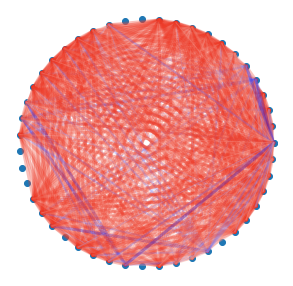

In [21]:
mul_factor = 2

x,y = [],[]
for i in np.linspace(0,1, 48):
    angle = i*(math.pi*2)
    x.append(math.cos(angle)*mul_factor);
    y.append(math.sin(angle)*mul_factor);

import itertools
xpair = [i for i in itertools.combinations(x,2)]
ypair = [i for i in itertools.combinations(y,2)]

plt.figure(figsize=(5,5))
for i in range(len(corrlist)):
    lw_, c, al = conn_line_color(corrlist[i])
    plt.plot(xpair[i], ypair[i], color=c, alpha=0.3, lw=lw_)

plt.scatter(x,y)
plt.axis('off')

In [22]:
input_signal = np.corrcoef(hbo)
input_signal = np.triu(input_signal, k=0)
corr_mat = np.triu(input_signal, k=0)
#pd.DataFrame(corr_mat)

module

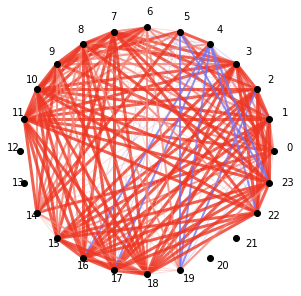

In [23]:
rightHemis = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,22,25,26,29,30])-1
leftHemis =  [i for i in list(range(48)) if i not in rightHemis]
hbo_r = hbo[rightHemis]

mul_factor=1

def correlationWeb(hbo):
    input_signal = np.corrcoef(hbo)
    input_signal = np.triu(input_signal, k=0)
    corr_mat = np.triu(input_signal, k=0)
    corrlist = []
    a = 1
    for i in corr_mat:
        corrlist.extend(i[a:])
        a+=1
    x,y = [],[]
    for i in np.linspace(0,1, len(hbo)+1): # both start and end are included therefore add one and subtract one
        angle = i*(math.pi*2)
        x.append(math.cos(angle)*mul_factor);
        y.append(math.sin(angle)*mul_factor);
    
    x = x[:-1]
    y = y[:-1]
    import itertools
    xpair = [i for i in itertools.combinations(x,2)]
    ypair = [i for i in itertools.combinations(y,2)]
    
    plt.figure(figsize=(5,5))
    for i in range(len(corrlist)):
        lw_, c, a = conn_line_color(corrlist[i])
        plt.plot(xpair[i], ypair[i], color=c, alpha=a*0.8, lw=lw_)  
    plt.scatter(x,y, zorder=10, color='black')
    plt.axis('off')
    plt.grid(color='w')
    
    xx = np.array(x)
    yy= np.array(y)
    nums = [str(i) for i in range(len(hbo))]
    xx = xx*1.1
    yy = yy*1.1
    for i in range(len(nums)):
        plt.text(xx[i], yy[i], nums[i])
    return plt


ff = correlationWeb(hbo[rightHemis])
type(ff)
#correlationWeb(hbo[rightHemis])

In [123]:
len(hbo)

48

Text(0.5, 1.0, 'Left Hemisphere')

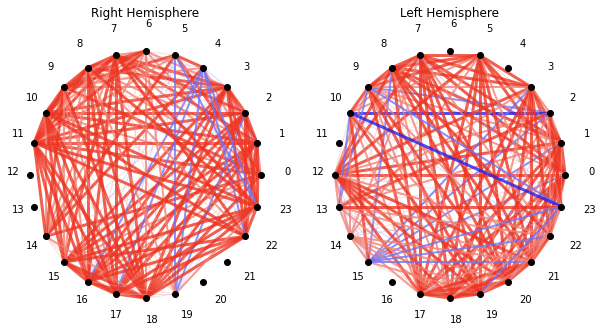

In [24]:
def corrmat(hbo):
    input_signal = np.corrcoef(hbo)
    input_signal = np.triu(input_signal, k=0)
    corr_mat = np.triu(input_signal, k=0)
    corrlist = []
    a = 1
    for i in corr_mat:
        corrlist.extend(i[a:])
        a+=1
    return corrlist

rightHemis = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,22,25,26,29,30])-1
leftHemis =  [i for i in list(range(48)) if i not in rightHemis]
rhbo= corrmat(hbo[rightHemis])
lhbo= corrmat(hbo[leftHemis])
mul_factor=1

x,y = [],[]
for i in np.linspace(0,1, 25): # both start and end are included therefore add one and subtract one
    angle = i*(math.pi*2)
    x.append(math.cos(angle)*mul_factor);
    y.append(math.sin(angle)*mul_factor);

x = x[:-1]
y = y[:-1]
import itertools
xpair = [i for i in itertools.combinations(x,2)]
ypair = [i for i in itertools.combinations(y,2)]


f, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(10,5))


for i in range(len(rhbo)):
    lw_, c, a = conn_line_color(rhbo[i])
    ax1.plot(xpair[i], ypair[i], color=c, alpha=a*0.8, lw=lw_, zorder=1)  
ax1.scatter(x,y, zorder=3, c='black')
ax1.axis('off')

xx, yy = np.array(x), np.array(y)
nums = [str(i) for i in range(24)]
xx, yy = xx*1.2, yy*1.2
for i in range(len(nums)):
    ax1.text(xx[i], yy[i], nums[i])
ax1.set_title('Right Hemisphere', pad=22)

for i in range(len(lhbo)):
    lw_, c, a = conn_line_color(lhbo[i])
    ax2.plot(xpair[i], ypair[i], color=c, alpha=a*0.8, lw=lw_, zorder=1)  
ax2.scatter(x,y, zorder=3, c='black')
ax2.axis('off')

nums = [str(i) for i in range(24)]
for i in range(len(nums)):
    ax2.text(xx[i], yy[i], nums[i])
ax2.set_title('Left Hemisphere', pad=22)
    

# #plt.grid()

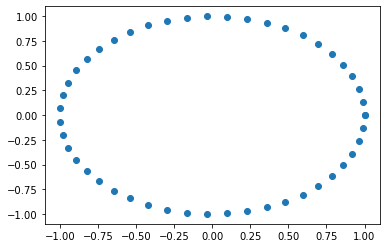

In [25]:
# get node locations on a circle. in order of desired channel loc order
import random
import math
import matplotlib.pyplot as plt


def circle():
    x = []
    y = []
    for i in np.linspace(0,1,48):
        angle = i*(math.pi*2)
        x.append(math.cos(angle));
        y.append(math.sin(angle));
    plt.scatter(x,y)
    plt.show()
circle()
# look into the triu, note order of the called pairs
# create stpt, edpt with it in form of [x1,x2][y1,y2]
# done


(15, 205)
1.1710035800933838


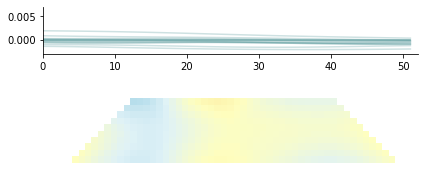

In [28]:
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
from scipy.interpolate import griddata, LinearNDInterpolator
import time
import scipy
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import os, glob

ttt = time.time()
hbo = pd.read_csv('testarray.csv', header=None).to_numpy()[:,300:800]

hbo_orig = hbo[3:18]
print(hbo_orig.shape)
hbo = hbo_orig.copy()

# adding chrej
# somenull = [5,6,7,8]
# chrej = [False]*15
# chrej = np.array(chrej)
# chrej[somenull]=True
# for i in somenull:
#   hbo[i,:] = np.nan


d_op = 2.5
nch = 15
mesh_per_cm = 4
side_offset = 0.75
sor = np.array([[1,2,1,2,1],[2,3,4,5,6]])
det = np.array([[1,2,1,2,1,2,1],[1,2,3,4,5,6,7]])
Sources = np.vstack( (d_op*(sor[1]-1), d_op*(sor[0]-1)+side_offset) )
Detectors = np.vstack( (d_op*(det[1]-1), d_op*(det[0]-1)+side_offset) )
tMeas = np.array([[1,1,2,1,2,2,3,3,4,3,4,4,5,5,5],[1,2,2,3,3,4,3,4,4,5,5,6,5,6,7]])
Meas_s = np.array([Sources.T[a-1] for a in list(tMeas[0])]).T
Meas_d = np.array([Detectors.T[a-1] for a in list(tMeas[1])]).T
spot_x = [(Meas_s[0][a] + Meas_d[0][a])/2  for a in range(nch)]
spot_y = [(Meas_s[1][a] + Meas_d[1][a])/2 for a in range(nch)]
xy_ = np.vstack((spot_x, spot_y))*mesh_per_cm
zs_masked = np.ma.masked_invalid(hbo)
masked_x = xy_[0][~zs_masked[:,0].mask]
masked_y = xy_[1][~zs_masked[:,0].mask]
masked_hbo = hbo[~zs_masked[:,0].mask]
#a,b = np.meshgrid( np.arange(0.1,60.1,0.5), np.arange(0.1,15.1,0.5))
a,b = np.meshgrid( np.arange(0.1,60.1,1), np.arange(0.1,16.1,1))




hbolist = []
tpt = time.time()

folder = 'ff'
hbo = hbo[:,::4]

f, (ax1, ax2) = plt.subplots(2,1, sharey=False, gridspec_kw={'height_ratios': [1,6]})
#ax1.figure(figsize=(3,4))

for h in hbo:
    ax1.plot(h, c='cadetblue', alpha=0.3)
ax1.set_xlim([0, hbo.shape[-1]])
ax1.set_ylim([-0.003, 0.007])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


for i in range(hbo.shape[-1]):
    zs_masked = np.ma.masked_invalid(hbo)
    masked_x = xy_[0][~zs_masked[:,0].mask]
    masked_y = xy_[1][~zs_masked[:,0].mask]
    masked_hbo = hbo[~zs_masked[:,0].mask]
    grid = griddata((masked_x, masked_y), masked_hbo[:,i], (a,b), method='cubic', fill_value=np.nan) # pick the normal ones then explode it
    
    line = ax1.axvline(i, lw=3, c='black')
    ax2.set_xlim([0, 58])
    ax2.set_ylim([0, 15])
    ax2.imshow(grid, vmax=0.005, vmin=-0.005, alpha=0.7).set_cmap("RdYlBu_r")
    plt.axis(False)
    plt.tight_layout()
    #plt.savefig(f'{folder}/test{i}.png')
    line.remove()

print(time.time()-ttt)


In [37]:
import matplotlib as mpl
import cv2
import os, glob

video_name = 'video.mp4'

images = glob.glob(f'{folder}/*.png')
images.sort(key=lambda x:int(x.split('test')[1].split('.')[0]))
#images = [img for img in os.listdir('figures') if img.endswith(".png")]
#frame = cv2.imread(os.path.join(image_folder, images[0]))
frame = cv2.imread(images[0])
height, width, layers = frame.shape
video = cv2.VideoWriter(video_name, 0, 16, (width,height))

for image in images:
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()

IndexError: list index out of range

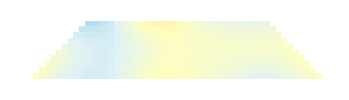

In [31]:
folder = 'g'
f, ax = plt.subplots()
for i in range(hbo.shape[-1]):
    grid = griddata((masked_x, masked_y), masked_hbo[:,i], (a,b), method='cubic', fill_value=np.nan) # pick the normal ones then explode it
    ax.set_xlim([0, 58])
    ax.set_ylim([0, 15])
    ax.imshow(grid, vmax=0.005, vmin=-0.005, alpha=0.7).set_cmap("RdYlBu_r")
    plt.axis(False)
    #plt.savefig(f'{folder}/test{i}.png')
    




0.5469989776611328


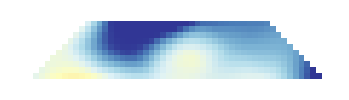

In [33]:
# single shot, into animation with matplotlib package
hbo = pd.read_csv('testarray_hz.csv').set_index('hz').iloc[:,:-1].to_numpy().T
zs_masked = np.ma.masked_invalid(hbo)
masked_x = xy_[0][~zs_masked[:,0].mask]
masked_y = xy_[1][~zs_masked[:,0].mask]
masked_hbo = hbo[~zs_masked[:,0].mask]
a,b = np.meshgrid( np.arange(0.1,60.1,1), np.arange(0.1,16.1,1))
import matplotlib.animation as animation

import time
aa = time.time()

ims = []
fig=plt.figure()
plt.xlim([0,58])
plt.ylim([0,15]) 
for i in range(hbo.shape[-1])[::4]:
    grid = griddata((masked_x, masked_y), masked_hbo[:,i], (a,b), method='cubic', fill_value=np.nan) # pick the normal ones then explode it
    im = plt.imshow(grid, vmax=0.005, vmin=-0.005, alpha=0.7, animated=True, cmap="RdYlBu_r") 
    plt.axis(False)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=250, repeat=False)

#ani.save('asdf2.mp4')

print(time.time()-aa)

In [449]:
1853/4

463.25

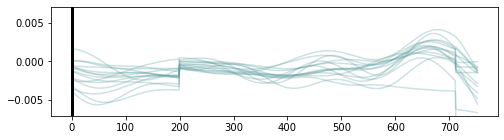

In [34]:
# attempt for sliding vline
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
dhbo = hbo.copy()
import time
aa = time.time()

ims = []
global line
fig, ax = plt.subplots(figsize =( 8,2))
ax.set(ylim=(-0.007,0.007))
ax.plot(hbo.T, c='cadetblue', alpha=0.3)[0]
line = ax.axvline(0, lw=3, c='black')
def animate(i):
    global line
    line.remove()
    line = ax.axvline(i, lw=1, c='black')
    

ani = FuncAnimation(fig, animate, interval=50, frames=30)
#ani.save('slidingvline.mp4')

0.038007259368896484


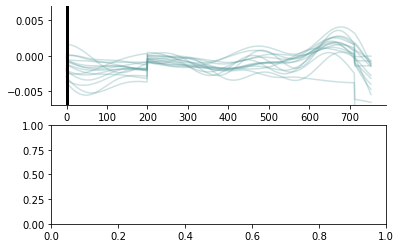

In [35]:
# attempt for two
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import time
aa = time.time()


fig, (ax1, ax2) = plt.subplots(2,1, sharey=False)#, gridspec_kw={'height_ratios': [1,2]})

dhbo = hbo[:,::4]

global line
ax1.set(ylim=(-0.007,0.007))
ax1.plot(hbo.T, c='cadetblue', alpha=0.3)[0]
line = ax1.axvline(0, lw=3, c='black')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax2.imshow(grid, vmax=0.005, vmin=-0.005, alpha=0.7, cmap="RdYlBu_r")
#grid = griddata((masked_x, masked_y), masked_hbo[:,0], (a,b), method='cubic', fill_value=np.nan) # pick the normal ones then explode it

def animate(i):
    global line
    line.remove()
    line = ax1.axvline(i*8, lw=1, c='black')
    grid = griddata((masked_x, masked_y), masked_hbo[:,i*8], (a,b), method='cubic', fill_value=np.nan) # pick the normal ones then explode it
    ax2.imshow(grid, vmax=0.005, vmin=-0.005, alpha=0.7, cmap="RdYlBu_r")
    plt.axis(False)
    
ani = FuncAnimation(fig, animate, interval=100, frames=200)
#ani.save('tooSlowToGenerate.mp4')
print(time.time()-aa)

6.72032618522644


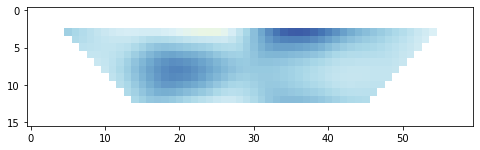

In [36]:
# attempt for heatmap single
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
dhbo = hbo.copy()
import time
aa = time.time()

fig, ax = plt.subplots(figsize =( 8,4))

global line

def animate(i):
    grid = griddata((masked_x, masked_y), masked_hbo[:,i*4], (a,b), method='cubic', fill_value=np.nan) # pick the normal ones then explode it
    ax.imshow(grid, vmax=0.005, vmin=-0.005, alpha=0.7, cmap="RdYlBu_r")
    
ani = FuncAnimation(fig, animate, interval=50, frames=30)
ani.save('heatmap_ani.mp4')
print(time.time()-aa)